In [ ]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
#nltk.download()

In [3]:
with open("Tesla_Comments.json", "r") as file:
    tesla_data = json.load(file)
    
with open("GE_Comments.json", "r") as file:
    ge_data = json.load(file)
    
with open("AMD_Comments.json", "r") as file:
    amd_data = json.load(file)
    
with open("NVDA_Comments.json", "r") as file:
    nvda_data = json.load(file)

    
tesla_stock_data = pd.read_csv("TSLA.csv")
ge_stock_data = pd.read_csv("GE.csv")
amd_stock_data = pd.read_csv("AMD.csv")
nvda_stock_data = pd.read_csv("NVDA.csv")

comms = [tesla_data, ge_data, amd_data, nvda_data]
stocs = [tesla_stock_data, ge_stock_data, amd_stock_data, nvda_stock_data]
tickers = ["TSLA","GE","AMD","NVDA"]

In [4]:
# Combining and Cleaning Finance and Social Media data

combined = pd.DataFrame()
for comm, stoc, ticker in zip(comms, stocs, tickers):
    
    df_comments = pd.json_normalize(comm).transpose()
    
    df_stock_info = stoc.set_index("Date")
    
    joined_df = df_stock_info.join(df_comments)
    
    joined_df["Price_Change"] = joined_df["Close"] - joined_df["Open"]

    def dire(x):
        if x>0:
            return "up"
        elif x<0:
            return "down"
        else:
            return "no change"

    joined_df["Direction"] = joined_df["Price_Change"].apply(dire) 

    joined_df["Ticker"] = ticker

    joined_df2 = joined_df.rename(columns={"Open":"Open_Price","High":"High_Price","Low":"Low_Price","Close":"Close_Price",
                              "Volume":"Trade_Volume","Direction":"Price_Direction",0:"Posts/Comments"})
    
    joined_df3 = joined_df2c
    
    combined = pd.concat([combined,joined_df3])

In [84]:
# Create Count and Sentiment Columns

Number_of_Posts_Comments = []
Positive_Sentiment = []
Negative_Sentiment = []
sia = SentimentIntensityAnalyzer()
for p_cs in combined["Posts/Comments"]:
    Number_of_Posts_Comments.append(len(p_cs))
    
    # sentiments for each comment in a single day
    tot_pos = 0
    tot_neg = 0
    for comment in p_cs:
        pos = sia.polarity_scores(comment)["pos"]
        tot_pos = tot_pos + pos
        
        neg = sia.polarity_scores(comment)["neg"]
        tot_neg = tot_neg + neg
        
    Positive_Sentiment.append(tot_pos)
    Negative_Sentiment.append(tot_neg) 

In [85]:
combined["Number_of_Posts_Comments"] = Number_of_Posts_Comments
combined["Positive_Sentiment"] = Positive_Sentiment
combined["Negative_Sentiment"] = Negative_Sentiment

combined2 = combined[["Ticker","Posts/Comments","Number_of_Posts_Comments",
                      "Positive_Sentiment","Negative_Sentiment","Price_Change",
                      "Price_Direction","Open_Price","Close_Price","High_Price",
                      "Low_Price","Trade_Volume"]]

In [86]:
combined2

,Ticker,Posts/Comments,Number_of_Posts_Comments,Positive_Sentiment,Negative_Sentiment,Price_Change,Price_Direction,Open_Price,Close_Price,High_Price,Low_Price,Trade_Volume
Date,,,,,,,,,,,,
2021-01-04,TSLA,"[Hallo,\n\nwegwerfaccount wegen Privatsphäre.\...",4,0.230,0.194,10.309998,up,719.460022,729.770020,744.489990,717.190002,48638200
2021-01-05,TSLA,[I'm seriously considering reducing the number...,14,1.311,0.608,11.450012,up,723.659973,735.109985,740.840027,719.200012,32245200
2021-01-06,TSLA,[Reuters is reporting that BABA is raising 5 B...,9,1.422,0.400,-2.510010,down,758.489990,755.979980,774.000000,749.099976,44700000
2021-01-07,TSLA,"[[removed], Sorry, your [submission](https://w...",4,0.255,0.450,38.409973,up,777.630005,816.039978,816.989990,775.200012,51498900
2021-01-08,TSLA,[Building my own ETF per say. Would like some ...,8,0.791,0.442,24.020020,up,856.000000,880.020020,884.489990,838.390015,75055500
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,NVDA,[],1,0.000,0.000,13.239990,up,597.369995,610.609985,613.400024,596.010010,5687500
2021-04-26,NVDA,[],0,0.000,0.000,11.719971,up,607.400024,619.119995,619.159973,605.000000,4944900
2021-04-27,NVDA,[],0,0.000,0.000,-7.869995,down,623.140015,615.270020,626.820007,614.179993,4114300


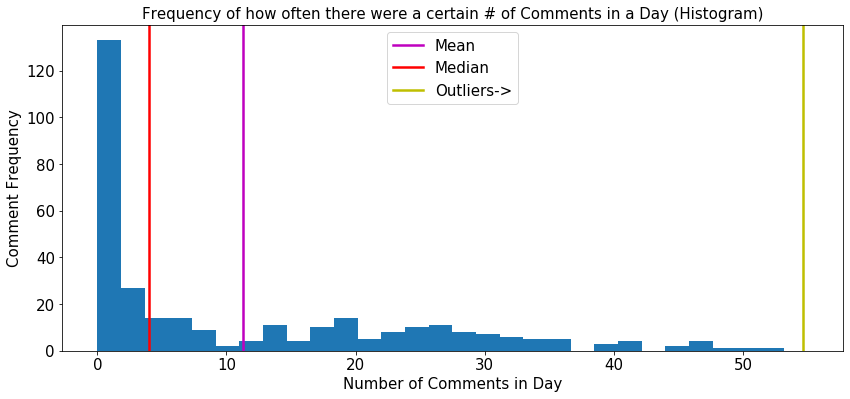

In [87]:
# Comment Frequency EDA Visualization

num_comms_day = []
for comm in combined2["Posts/Comments"]:
    num_comms_day.append(len(comm))

mean2 = np.mean(num_comms_day)
median2 = np.median(num_comms_day)
sta_d = np.std(num_comms_day)
outliers = (mean2 + (3 * sta_d))
   
    
# GRAPH
hist_fig = plt.figure(figsize = (14, 6))
    
plt.hist(num_comms_day, bins = 30, range = [0,55])

plt.title("Frequency of how often there were a certain # of Comments in a Day (Histogram)", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.ylabel("Comment Frequency", fontsize = 15)
plt.xlabel("Number of Comments in Day", fontsize = 15)

plt.axvline(mean2, color = 'm', linewidth = 2.5, label = "Mean")
plt.axvline(median2, color = 'r', linewidth = 2.5, label = "Median")
plt.axvline(outliers, color = 'y', linewidth = 2.5, label = "Outliers->")
plt.legend(fontsize = 15)


In [88]:
# There's a pretty even distribution of comments on a day until we get to below 5




Text(0.5, 0, 'Number of Comments in Day')

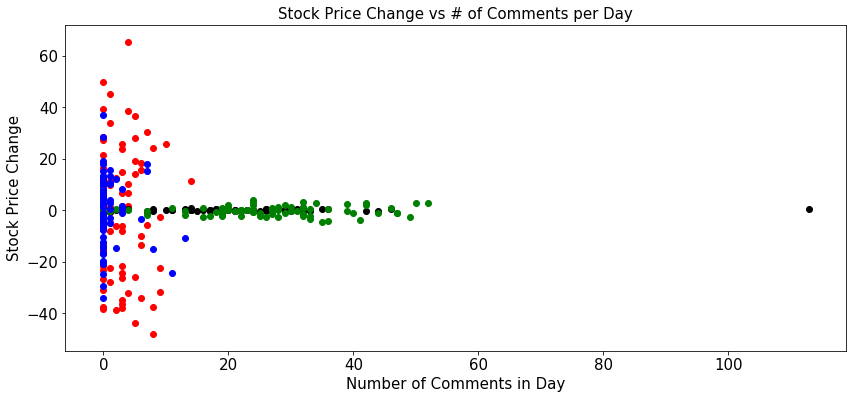

In [89]:
# Stock Price Change vs Comments Per Day EDA Visualization

ticker = list(combined2["Ticker"].values)

colors = []
for t in ticker:
    if t == "TSLA":
        colors.append("red")
    elif t == "AMD":
        colors.append("green")
    elif t == "NVDA":
        colors.append("blue")
    elif t == "GE":
        colors.append("black")

num_comms_day
p_change = list(combined2["Price_Change"].values)

# GRAPH
scat_fig = plt.figure(figsize = (14, 6))
     
    
for i in range(len(ticker)):
    plt.scatter(num_comms_day[i], p_change[i], c=colors[i])

plt.title("Stock Price Change vs # of Comments per Day", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.ylabel("Stock Price Change", fontsize = 15)
plt.xlabel("Number of Comments in Day", fontsize = 15)

In [9]:
## ABOVE interesting, Company with fewer number of comments in day have more price volatility.

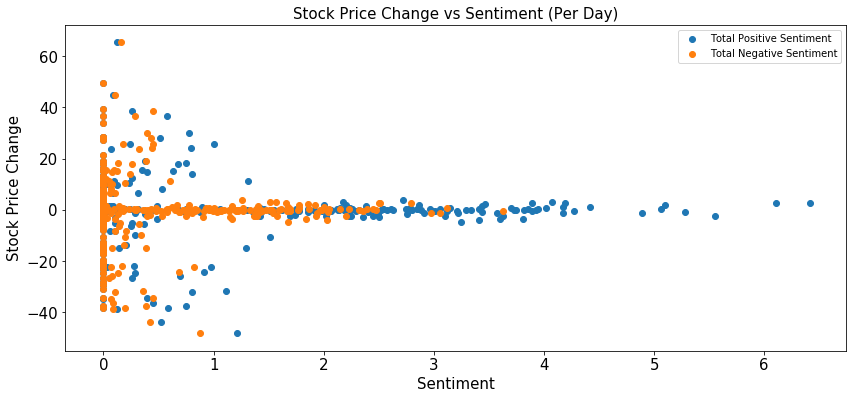

In [95]:
# Stock Price Change vs Sentiment EDA Visualization

p_change = list(combined2["Price_Change"].values)
p_sent = list(combined2["Positive_Sentiment"].values)
n_sent = list(combined2["Negative_Sentiment"].values)


# GRAPH
scat_fig = plt.figure(figsize = (14, 6))

plt.scatter(p_sent, p_change, label = "Total Positive Sentiment")
plt.scatter(n_sent, p_change, label = "Total Negative Sentiment")

plt.title("Stock Price Change vs Sentiment (Per Day)", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.ylabel("Stock Price Change", fontsize = 15)
plt.xlabel("Sentiment", fontsize = 15)

plt.legend()

In [ ]:
# When Strong Sentiment is low, volatility is high

In [ ]:

# More Analysis...


###  When sentiment/feelings and number of comments are low, Price Volatility is High

### When lot of sentiment/strong feelings and comments are high, Price Volatility is Low

# This is surprising, you would have thought this was the other way around. 
# The need for more data may be required, as the visualization shows each company...
    #...is clustered in a particular spot on the graph.

In [ ]:
### HOWEVER... it appears, even amongst each individual company, the scatter...
    ###... plots appear to show an even distribution along the y axis.  This doesn't 
    ###... point to strong hope of spotting any strong correlations.